In [1]:
import dask.dataframe as dd

### Load the five csv files into one Dask Dataframe. It should have a length of 1956 rows, and 5 columns.

In [2]:
df = dd.read_csv('Youtube*-*.csv')

In [5]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [7]:
df.count().compute()

COMMENT_ID    1956
AUTHOR        1956
DATE          1711
CONTENT       1956
CLASS         1956
dtype: int64

### Use the Dask Dataframe to compute the counts of spam (1005 comments) versus the counts of legitimate comments (951).

In [11]:
df['CLASS'].value_counts().compute()

1    1005
0     951
Name: CLASS, dtype: int64

### Spammers often tell people to check out their stuff! When the comments are converted to lowercase, then 461 spam comments contain the word "check", versus only 19 legitimate comments which contain the word "check." Use the Dask Dataframe to compute these counts.

In [40]:
df['CONTENT'] = df['CONTENT'].str.lower()

In [44]:
df['contains_check'] = df['CONTENT'].str.contains('check')

In [56]:
df.groupby(['CLASS']).contains_check.apply(lambda x: x.value_counts(), meta=('contains_check','str')).compute()

CLASS       
0      False    932
       True      19
1      False    544
       True     461
Name: contains_check, dtype: int64

# Visualization of Comments By Hour of Day

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
df['DATE'] = df['DATE'].astype('M8[us]')

In [82]:
df['HOUR'] = df['DATE'].dt.hour

In [92]:
df['HOUR'] = df['HOUR'].fillna(method='ffill')

In [93]:
df['HOUR'].isnull().sum().compute()

0

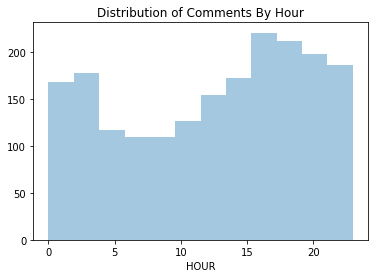

In [123]:
sns.distplot(df['HOUR'], kde=False)
plt.title('Distribution of Comments By Hour')
plt.show()

In [115]:
import pandas as pd
spam = df[ df['CLASS'] == 1 ]
real = df[ df['CLASS'] == 0 ]

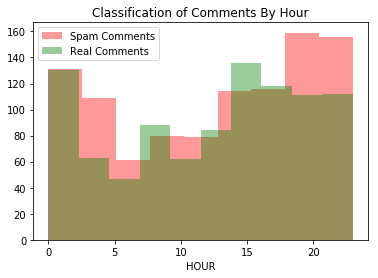

In [124]:

sns.distplot(spam['HOUR'], kde=False, color='r', label="Spam Comments")
sns.distplot(real['HOUR'], kde=False, color='g', label="Real Comments")
plt.title('Classification of Comments By Hour')
plt.legend()
plt.show()